In [116]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")
sns.set_context("poster")

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.regressionplots import influence_plot 
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] =  6
plt.rcParams["figure.figsize"] = fig_size

from pandas.plotting import scatter_matrix
from sklearn.datasets import load_boston

In [117]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [118]:
bostondf = pd.DataFrame(boston.data, columns=boston.feature_names)
bostondf['MEDV'] = boston.target

In [119]:
bostondf.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM         AGE         DIS         RAD         TAX     PTRATIO           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   28.148861    2.105710    8.707259  168.537116    2.164946   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000    2.900000    1.129600    1.000000  187.000000   12.600000    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   45.025000    2.100175    4.000000  279.000000   17.400000  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000  100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   37.970000   50.000000

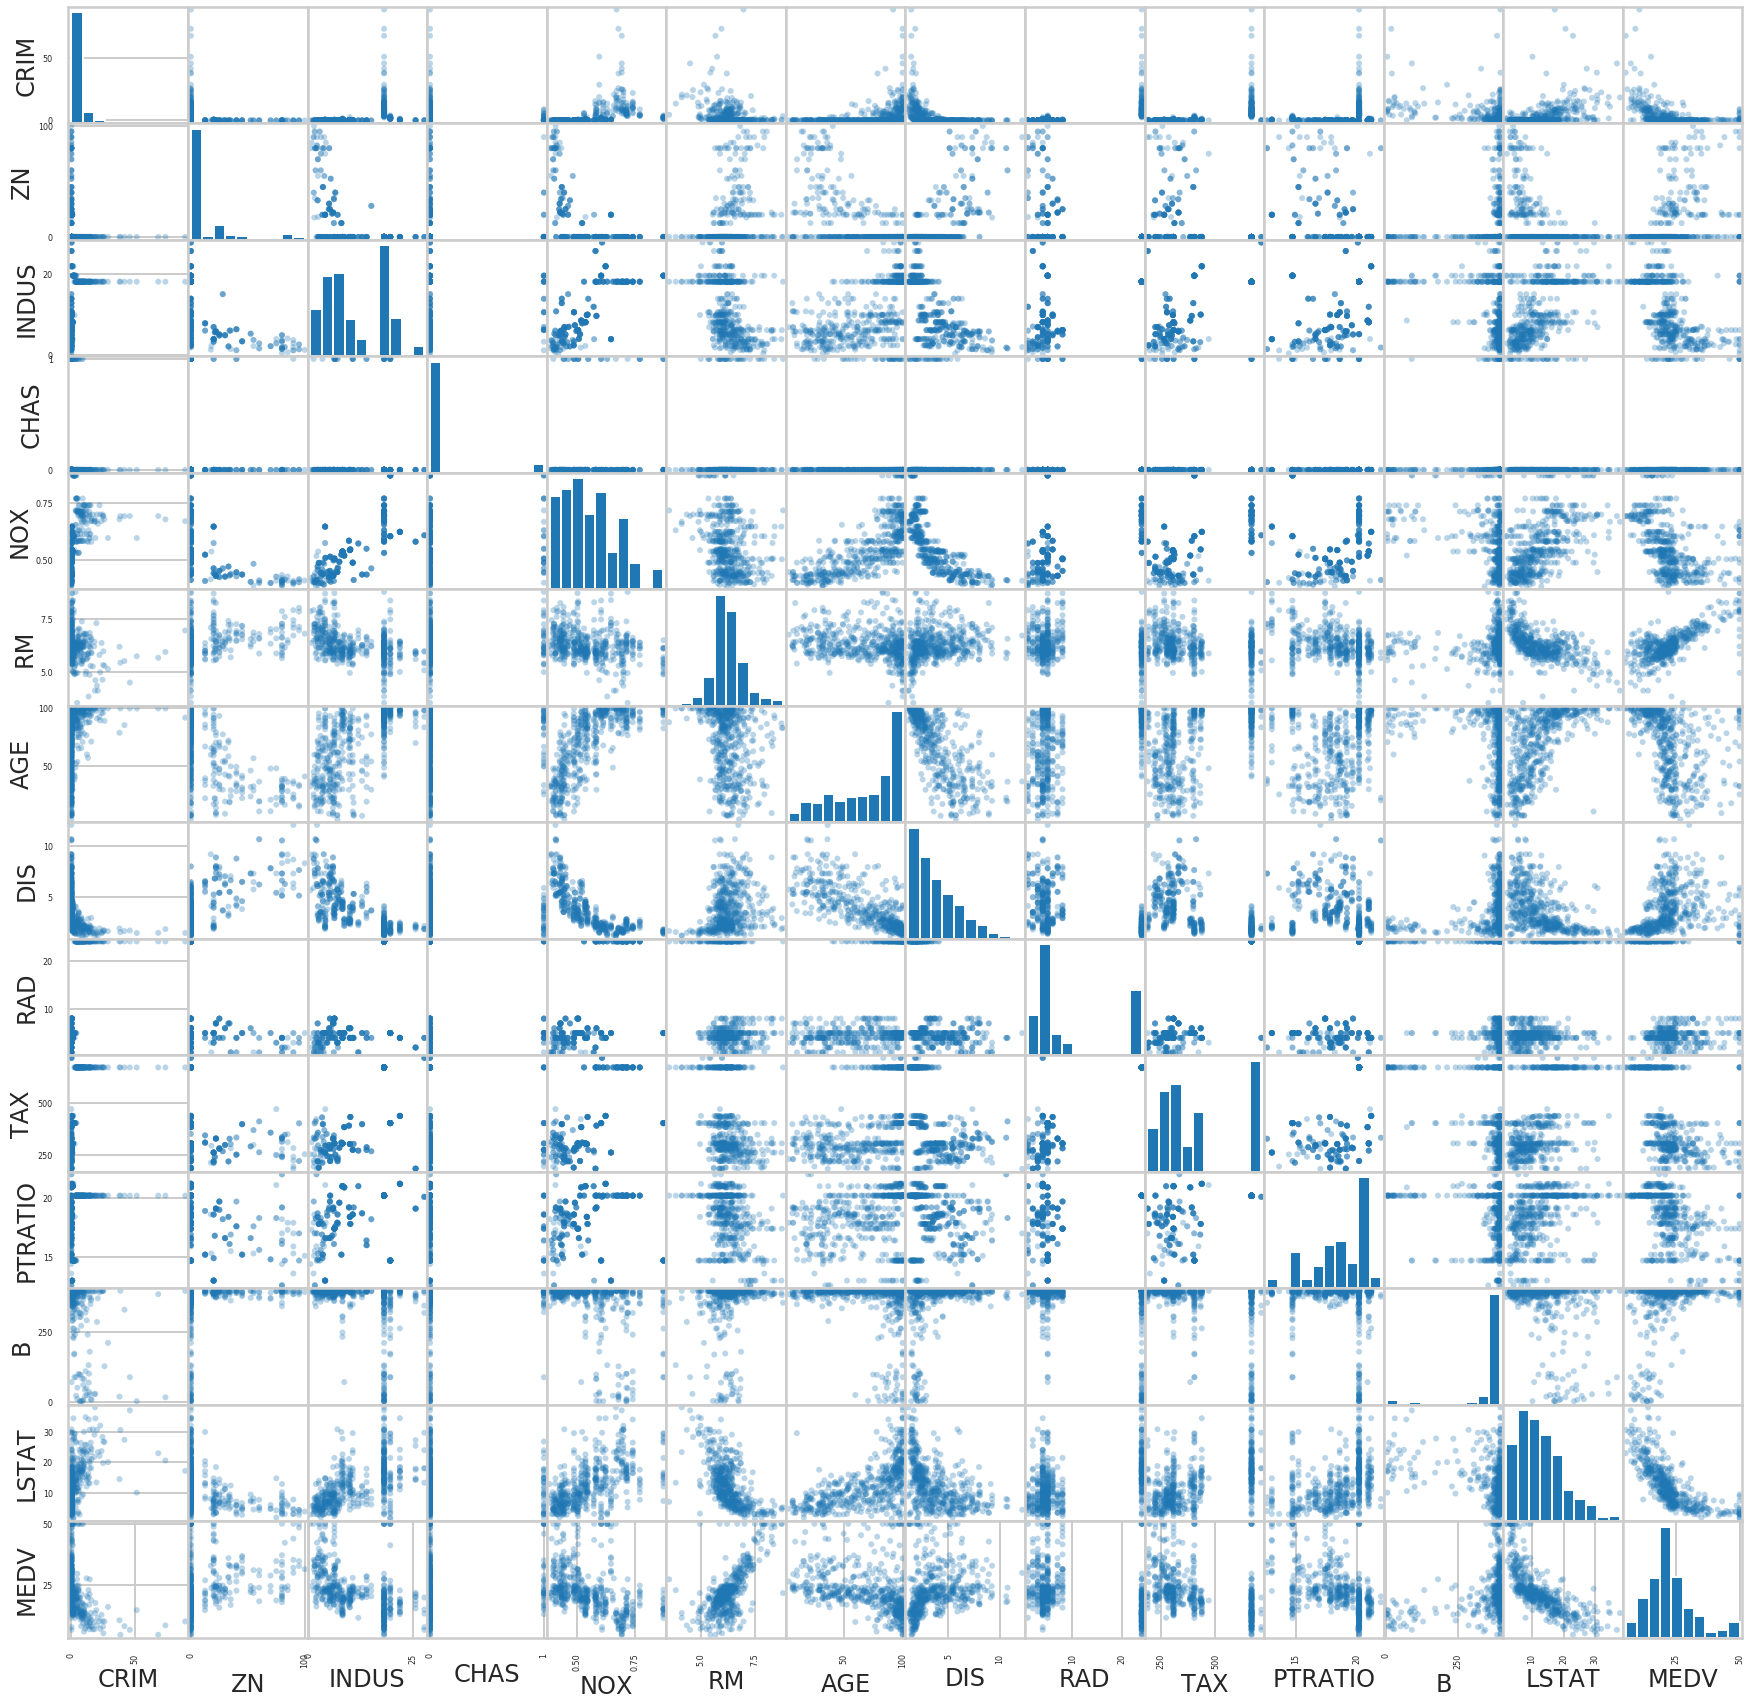

In [120]:
scatter_matrix(bostondf, alpha=0.3, diagonal='hist',figsize=(30,30));

In [121]:
features = ['CRIM','ZN','INDUS','CHAS','RM','AGE','LSTAT','DIS','RAD','B','TAX','PTRATIO','NOX']

X = bostondf[features]
Y = bostondf['MEDV']

In [122]:
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          6.72e-135
Time:                        16:02:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

/home/kurt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [123]:
model2 = sm.OLS.from_formula(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + RM + AGE + LSTAT + DIS + B + TAX + PTRATIO', data=bostondf)
results2 = model2.fit()
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     116.0
Date:                Sun, 22 Sep 2019   Prob (F-statistic):          3.63e-129
Time:                        16:02:27   Log-Likelihood:                -1517.4
No. Observations:                 506   AIC:                             3059.
Df Residuals:                     494   BIC:                             3110.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.2394      4.287      4.488      0.0

In [124]:
#Compute residuals
residuals = bostondf.MEDV - results.predict(X)
print("RSS: ",np.sum(residuals**2))
print("MSE: ",np.mean(residuals**2))

RSS:  11078.784577954979
MSE:  21.894831181729206


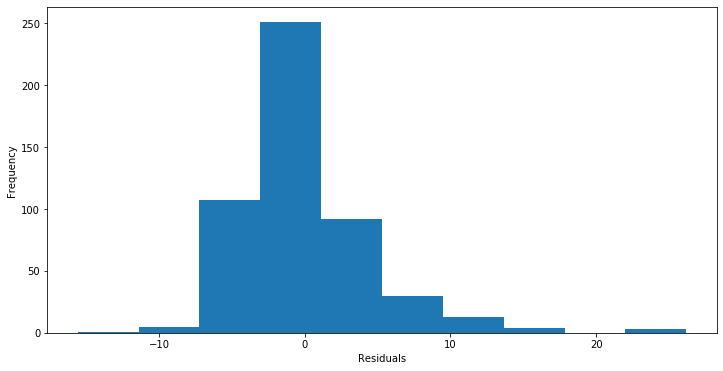

In [17]:
#Check if residuals are normally distributes
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.hist(results.resid)
plt.show()

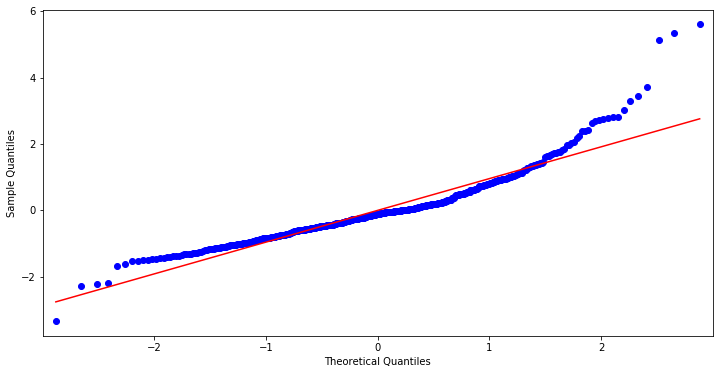

In [18]:
#QQ plot to check normality
fig = sm.qqplot(results.resid, fit=True, line='r')
plt.show()

When we fit a linear regression model to a particular data set, many prob-
lems may occur. Most common among these are the following:
1. Non-linearity of the response-predictor relationships.
2. Correlation of error terms.
3. Non-constant variance of error terms.
4. Outliers.
5. High-leverage points.
6. Collinearity.



## 1. Non-linearity of the Data
The linear regression model assumes that there is a straight-line relation-
ship between the predictors and the response. If the true relationship is
far from linear, then virtually all of the conclusions that we draw from the
fit are suspect. In addition, the prediction accuracy of the model can be
significantly reduced.
Residual plots are a useful graphical tool for identifying non-linearity.
Given a simple linear regression model, we can plot the residuals, e i =
y i − ŷ i , versus the predictor x i . In the case of a multiple regression model,
r
since there are multiple predictors, we instead plot the residuals versus
the predicted (or fitted) values ŷ i . Ideally, the residual plot will show no
discernible pattern. The presence of a pattern may indicate a problem with
some aspect of the linear model.

If the residuals exhibit a
clear U-shape, this provides a strong indication of non-linearity in the
data. 
__If the residual plot indicates that there are non-linear associations in the
data, then a simple approach is to use non-linear transformations of the
predictors, such as log X, X, and X 2 , in the regression model.__ 




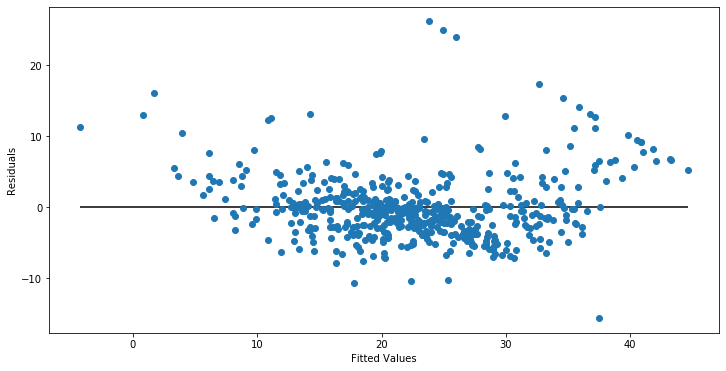

In [36]:
#Check for non-linearity of the data
#Residuals vs Fitted values
plt.plot(results.fittedvalues, results.resid, 'o')
plt.hlines(xmin = np.min(results.fittedvalues), xmax=np.max(results.fittedvalues),y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

1. if the residuals bounce around the zero line. This suggests that the assumption that the relationship is linear is valid
2.  If the residuals roughly form a 'horizontal band' around the 0 line this suggests that the variance of the error terms are equal. 
3.  No one residual 'stands out' from the basic random pattern of residuals. This suggests that there are no outiers.

## 2. Correlation of Error Terms
An important assumption of the linear regression model is that the error
terms,  1 ,  2 , . . . ,  n , are uncorrelated. What does this mean? For instance,
if the errors are uncorrelated, then the fact that  i is positive provides
little or no information about the sign of  i+1 . The standard errors that
are computed for the estimated regression coefficients or the fitted values

are based on the assumption of uncorrelated error terms. If in fact there
is correlation among the error terms, then the estimated standard errors
will tend to underestimate the true standard errors. As a result, confi-
dence and prediction intervals will be narrower than they should be. For
example, a 95 % confidence interval may in reality have a much lower prob-
ability than 0.95 of containing the true value of the parameter. In addition,
p-values associated with the model will be lower than they should be; this
could cause us to erroneously conclude that a parameter is statistically
significant. __In short, if the error terms are correlated, we may have an
unwarranted sense of confidence in our model.__
As an extreme example, suppose we accidentally doubled our data, lead-
ing to observations and error terms identical in pairs. If we ignored this, our
standard error calculations would be as if we had a sample of size 2n, when
in fact we have only n samples. Our estimated parameters would be the
same for the 2n samples as for the √ n samples, but the confidence intervals
would be narrower by a factor of 2!
Why might correlations among the error terms occur? Such correlations
frequently occur in the context of time series data, which consists of ob-
servations for which measurements are obtained at discrete points in time.
In many cases, observations that are obtained at adjacent time points will
have positively correlated errors. In order to determine if this is the case for
a given data set, __we can plot the residuals from our model as a function of
time. If the errors are uncorrelated, then there should be no discernible pat-
tern. On the other hand, if the error terms are positively correlated, then
we may see tracking in the residuals—that is, adjacent residuals may have
similar values.__
Many methods have been developed to properly take account of corre-
lations in the error terms in time series data. Correlation among the error
terms can also occur outside of time series data. For instance, consider a
study in which individuals’ heights are predicted from their weights. The
assumption of uncorrelated errors could be violated if some of the individ-
uals in the study are members of the same family, or eat the same diet,
or have been exposed to the same environmental factors. In general, the
assumption of uncorrelated errors is extremely important for linear regres-
sion as well as for other statistical methods, and good experimental design
is crucial in order to mitigate the risk of such correlations.__Correlation in the error terms suggests that there is additional information in the data that has not been exploited in the current model. When the observations have a natural sequential order, the correlation is referred to as autocorrelation__
Durbin Watson test can be used to test for the correlation of error terms. 
The null hypothesis of the test is that there is no serial correlation. The Durbin-Watson test statistics can be computed using:
    __statsmodels.stats.stattools.durbin_watson__
   The output ranges from 0 to 4. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation. When the output is 2 there is no serial correlation.As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data. However, the Durbin-Watson test only analyses linear autocorrelation and only between direct neighbors, which are first order effects.The critical values of DW for a given level of significance, sample size and number of independent variables can be obtained from published tables that are tabulated as pairs of values: DL (lower limit of DW) and DU (upper limit of DW). To evaluate DW [3] :https://www.real-statistics.com/statistics-tables/durbin-watson-table/

1) Locate values of DL and DU in Durbin-Watson statistic table.

2) For positive temporal autocorrelation:

a) If DW < DL then there is positive autocorrelation.

b) If DW > DU then there is no positive autocorrelation.

c) If DL < DW < DU then the test is inconclusive.

3) For negative temporal autocorrelation:

a) If DW < (4.0 ? DU) then there is no negative autocorrelation.

b) If DW > (4.0 ? DL) then there is negative autocorrelation.

c) If (4.0 ? DU) < DW < (4.0 ? DL) then the test is inconclusive.

A rule of thumb that is sometimes used is to conclude that there is no first order temporal autocorrelation if the DW statistic is between 1.5 and 2.5. A DW statistic below 1.5 indicates positive first order autocorrelation. A DW statistic of greater than 2.5 indicates negative first order autocorrelation [3] . Alternatively, a significant p-value for the DW statistic would suggest rejecting the null hypothesis and concluding that there is first order autocorrelation in the residuals, and a non-significant p-value would suggest accepting the null hypothesis and concluding that there is no evidence of first order autocorrelation in the residuals.

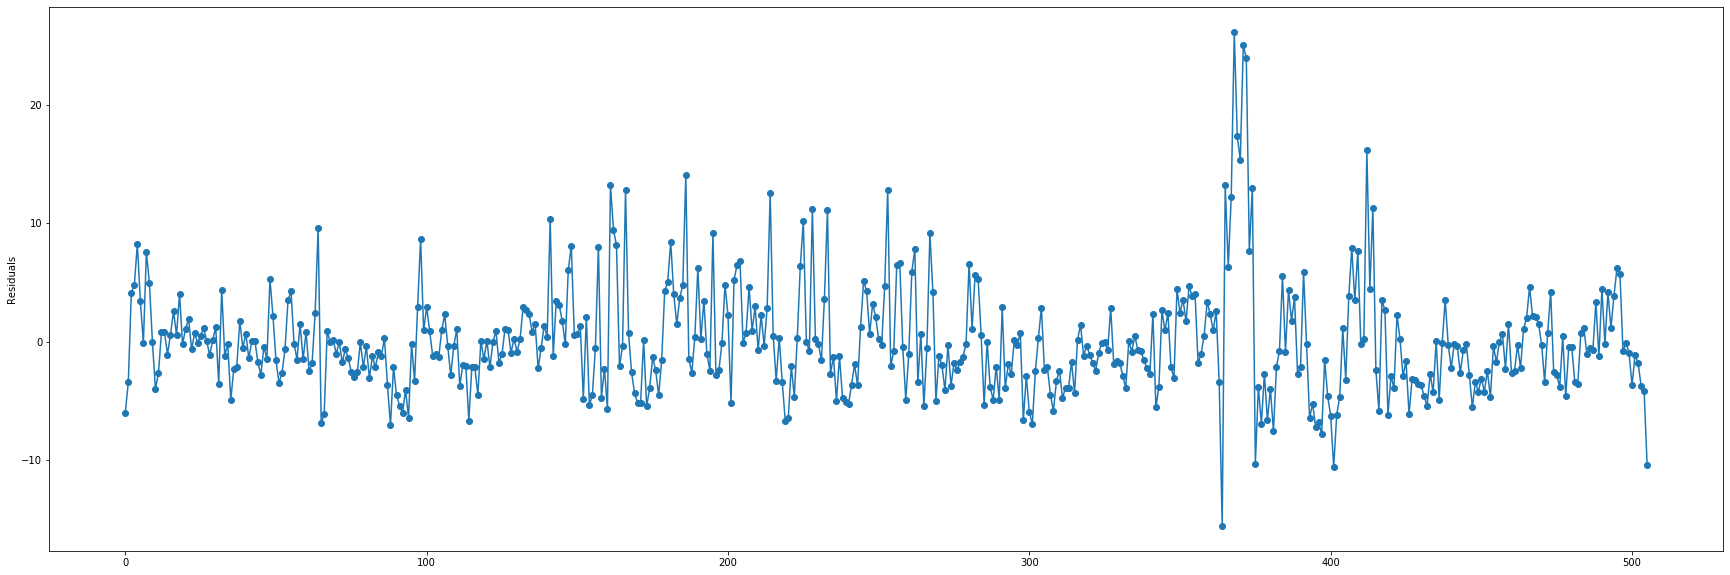

In [31]:
#Check for correlation of error terms
fig = plt.figure(figsize=(30,10))
plt.plot(results.resid,'o-')
plt.ylabel('Residuals')
plt.show()

In [34]:
#Use Durbin Watson to check correlation of error terms
dw_statistics = durbin_watson(results.resid)

In [35]:
print(dw_statistics)

1.0783751186797226

If 1.5 < dw_statistics < 2.5 there is no correlation but  It seems there is a slight positive correlation.
Probably OLS is not the best model here.


## 3. Non-constant Variance of Error Terms
Another important assumption of the linear regression model is that the
error terms have a constant variance, Var( i ) = σ 2 . The standard errors,
confidence intervals, and hypothesis tests associated with the linear model
rely upon this assumption.
Unfortunately, it is often the case that the variances of the error terms are
non-constant. For instance, the variances of the error terms may increase
with the value of the response. One can identify non-constant variances in
the errors, or __heteroscedasticity__, from the presence of a funnel shape in
the residual plot.  When faced with this problem, one possible solution is √ to trans-
form the response Y using a concave function such as log Y or Y . Such
a transformation results in a greater amount of shrinkage of the larger re-
sponses, leading to a reduction in heteroscedasticity. 
Sometimes we have a good idea of the variance of each response. For
example, the ith response could be an average of n i raw observations. If
each of these raw observations is uncorrelated with variance σ 2 , then their
average has variance σ i 2 = σ 2 /n i . In this case a simple remedy is to fit our
model by weighted least squares, with weights proportional to the inverse
variances—i.e. w i = n i in this case. Most linear regression software allows
for observation weights.



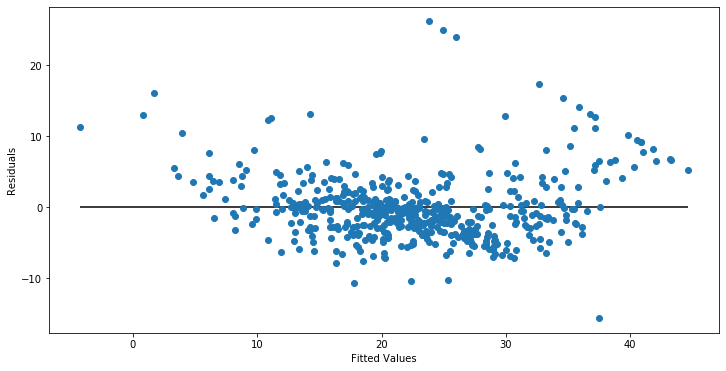

In [37]:
#Check for non constant variances
#Residuals vs Fitted values
plt.plot(results.fittedvalues, results.resid, 'o')
plt.hlines(xmin = np.min(results.fittedvalues), xmax=np.max(results.fittedvalues),y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

As there is no funnel shape in this plot we can conclude that there is no heteroscedasticity.

## 4. Outliers
An outlier is a point for which y i is far from the value predicted by the
model. Outliers can arise for a variety of reasons, such as incorrect recording
of an observation during data collection.
We can plot the studentized
residuals, computed by dividing each residual e i by its estimated standard
error. Observations whose studentized residuals are greater than 3 in abso-
lute value are possible outliers. 
If we believe that an outlier has occurred due to an error in data collec-
tion or recording, then one solution is to simply remove the observation.
However, care should be taken, since an outlier may instead indicate a
deficiency with the model, such as a missing predictor.


In [41]:
print(len(results.resid))

506


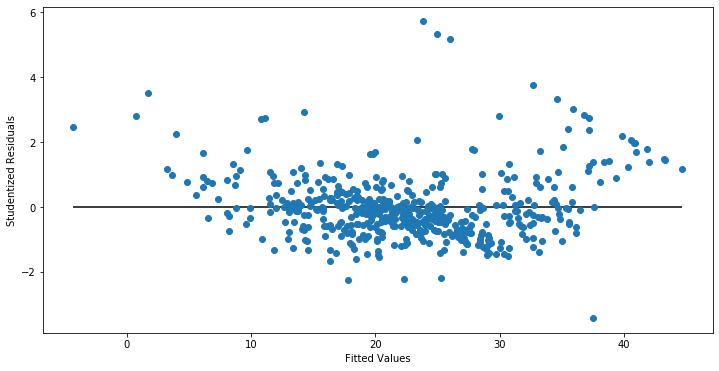

In [42]:
#Plot studentized residuals
influence = results.get_influence()

plt.plot(results.fittedvalues, influence.resid_studentized_internal, 'o')
plt.hlines(xmin = np.min(results.fittedvalues), xmax=np.max(results.fittedvalues),y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.show()

We can remove the observations for which the absolute value of studentized residual is more than 3 but having an outlier may indicate a missing predictor or model insufficiencey as well.

# 5. High Leverage Points
We just saw that outliers are observations for which the response y i is
unusual given the predictor x i . In contrast, observations with high leverage
have an unusual value for x i .  In fact, high leverage observations tend to have
a sizable impact on the estimated regression line. It is cause for concern if
the least squares line is heavily affected by just a couple of observations,
because any problems with these points may invalidate the entire fit. For
this reason, it is important to identify high leverage observations.
In a simple linear regression, high leverage observations are fairly easy to
identify, since we can simply look for observations for which the predictor
value is outside of the normal range of the observations. But in a multiple
linear regression with many predictors, it is possible to have an observation
that is well within the range of each individual predictor’s values, but that
is unusual in terms of the full set of predictors.
In order to quantify an observation’s leverage, we compute the leverage
statistic. A large value of this statistic indicates an observation with high
leverage. 



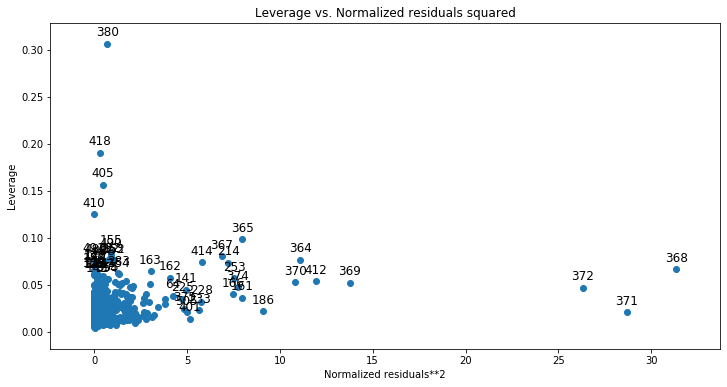

In [73]:
fig = plot_leverage_resid2(results)
plt.show()

In [74]:
 bostondf.ix[[380,368,372,371]]

/home/kurt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
380  88.97620  0.0   18.1   0.0  0.671  6.968   91.9  1.4165  24.0  666.0   
368   4.89822  0.0   18.1   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
372   8.26725  0.0   18.1   1.0  0.668  5.875   89.6  1.1296  24.0  666.0   
371   9.23230  0.0   18.1   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
380     20.2  396.90  17.21  10.4  
368     20.2  375.52   3.26  50.0  
372     20.2  347.88   8.88  50.0  
371     20.2  366.15   9.53  50.0

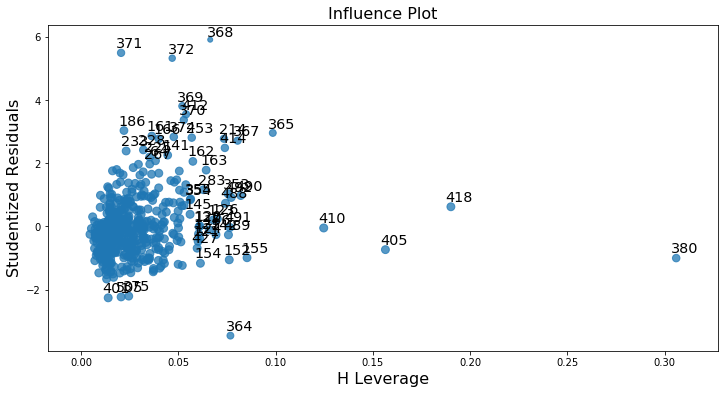

In [76]:
#Plot influence plot
influence_plot(results,size=5);
plt.show()

380 has high leverage but 371, 372 and 368 are more influential

/home/kurt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


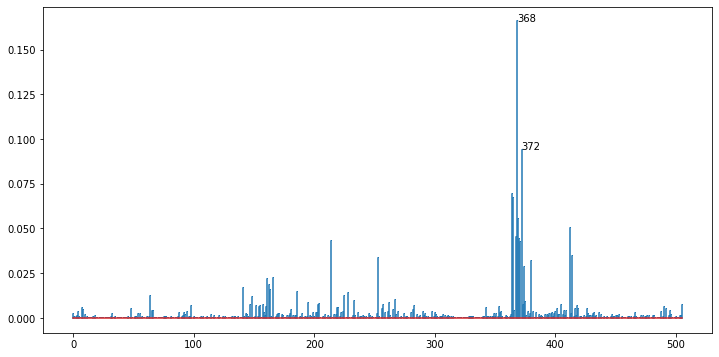

In [78]:
#Cookes distance is used to estimate the influence of a data point
# c is the distance and p is the p-value
(c,p) = influence.cooks_distance
plt.annotate("368",(368,c[368]))
plt.annotate("372",(372,c[372]))
plt.stem(np.arange(len(c)),c,markerfmt=",")
plt.show()

In [51]:
leverages = influence.hat_matrix_diag 
#Compute Threshold of influence
p = len(features) #Number of parameters
n = len(results.resid)
leverage_threshold = 2*(p+1)/n
#Print the indices of high leverage observations
print(X.index[leverages > leverage_threshold])

Int64Index([120, 121, 122, 123, 124, 125, 126, 142, 145, 152, 154, 155, 156,
            162, 163, 214, 253, 283, 353, 354, 355, 364, 365, 367, 368, 380,
            405, 410, 414, 418, 427, 488, 489, 490, 491, 492],
           dtype='int64')


In [55]:
#Table to diagnose influence points
print(influence.summary_frame().filter(["hat_diag","student_resid","dffits","cooks_d"]))


     hat_diag  student_resid    dffits   cooks_d
0    0.016925      -1.276881 -0.167540  0.002002
1    0.011109      -0.725580 -0.076905  0.000423
2    0.011823       0.875828  0.095800  0.000656
3    0.015696       1.018104  0.128567  0.001181
4    0.016110       1.757836  0.224929  0.003599
..        ...            ...       ...       ...
501  0.019495      -0.240966 -0.033978  0.000083
502  0.019197      -0.377521 -0.052816  0.000200
503  0.025755      -0.795517 -0.129343  0.001196
504  0.023163      -0.879958 -0.135501  0.001312
505  0.020508      -2.232872 -0.323094  0.007396

[506 rows x 4 columns]


Cooke's distance threshold:
\begin{equation*}
D \gt \frac{4}{n-p-1}
\end{equation*}

## 6. Collinearity
Collinearity refers to the situation in which two or more predictor variables collinearity
are closely related to one another. The presence of collinearity can pose problems in
the regression context, since it can be difficult to separate out the indi-
vidual effects of collinear variables on the response. 

Since collinearity reduces the accuracy of the estimates of the regression
coefficients, it causes the standard error for β̂ j to grow. Recall that the
t-statistic for each predictor is calculated by dividing β̂ j by its standard
error. Consequently, collinearity results in a decline in the t-statistic. As a
result, in the presence of collinearity, we may fail to reject H 0 : β j = 0. This
means that the power of the hypothesis test—the probability of correctly
detecting a non-zero coefficient—is reduced by collinearity.

A simple way to detect collinearity is to look at the correlation matrix
of the predictors. An element of this matrix that is large in absolute value
indicates a pair of highly correlated variables, and therefore a collinearity
problem in the data. Unfortunately, not all collinearity problems can be
detected by inspection of the correlation matrix: it is possible for collinear-
ity to exist between three or more variables even if no pair of variables
has a particularly high correlation. We call this situation multicollinearity.
Instead of inspecting the correlation matrix, a better way to assess multi-
collinearity is to compute the variance inflation factor (VIF). The VIF is
the ratio of the variance of β̂ j when fitting the full model divided by the
variance of β̂ j if fit on its own. The smallest possible value for VIF is 1,
which indicates the complete absence of collinearity. Typically in practice
there is a small amount of collinearity among the predictors. As a rule of
thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.  This can usually be done without much compromise to the regression
fit, since the presence of collinearity implies that the information that this
variable provides about the response is redundant in the presence of the
other variables. First solution is to drop one of the highly correlated variables. The second solution is
to combine the collinear variables together into a single predictor. For in-
stance, we might take the average of standardized versions of two variables in order to create a new variable.

In [69]:
#https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [70]:
X = calculate_vif_(X)

dropping 'const' at index: 0
dropping 'PTRATIO' at index: 10
dropping 'NOX' at index: 10
dropping 'RM' at index: 4
dropping 'TAX' at index: 8
dropping 'AGE' at index: 4
dropping 'B' at index: 6
dropping 'LSTAT' at index: 4
Remaining variables:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'DIS'], dtype='object')


In [71]:
features = ['CRIM','ZN','INDUS','CHAS','DIS']

X = bostondf[features]
Y = bostondf['MEDV']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results3 = model.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     62.99
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.63e-51
Time:                        14:13:25   Log-Likelihood:                -1716.6
No. Observations:                 506   AIC:                             3445.
Df Residuals:                     500   BIC:                             3471.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.7412      1.503     23.777      0.0

/home/kurt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Scikit-Learn

In [82]:
#Linear Regression
lm = LinearRegression()
features = ['CRIM','ZN','INDUS','CHAS','RM','AGE','LSTAT','DIS','RAD','B','TAX','PTRATIO','NOX']

X = bostondf[features]
Y = bostondf['MEDV']
lmfit = lm.fit(X,Y)
print('Estimated intercept coefficient:', lm.intercept_)
print('Adjusted R2 of the regression:', lm.score(X,Y))
print('Estimated intercept coefficient:', lm.coef_)

Estimated intercept coefficient: 36.45948838509001
Adjusted R2 of the regression: 0.7406426641094095
Estimated intercept coefficient: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  3.80986521e+00  6.92224640e-04 -5.24758378e-01 -1.47556685e+00
  3.06049479e-01  9.31168327e-03 -1.23345939e-02 -9.52747232e-01
 -1.77666112e+01]


In [83]:
residuals = Y - lmfit.predict(X)
print('RSS: ',np.sum(residuals**2))
print('MSE: ',np.mean(residuals**2))

RSS:  11078.784577954977
MSE:  21.894831181729202


In [84]:
#Select Recursive Backward Selection
rfe = RFE(estimator=lm, n_features_to_select=5, step=1)
rfe.fit(X,Y)
best_features = np.where(rfe.get_support())[0]
selected_features = [features[i] for i in best_features]
print(selected_features)

['CHAS', 'RM', 'DIS', 'PTRATIO', 'NOX']


In [85]:
#Try regression with selected features
lm = LinearRegression()
X = bostondf[selected_features]
rfe_model = lm.fit(X,Y)
print('Estimated intercept coefficient:', lm.intercept_)
print('Adjusted R2 of the regression:', lm.score(X,Y))
print('Estimated intercept coefficient:', lm.coef_)

Estimated intercept coefficient: 24.04988420771483
Adjusted R2 of the regression: 0.6336210768240027
Estimated intercept coefficient: [  3.92836212   6.64310629  -0.9312032   -1.2297111  -31.20519292]


In [93]:
#Select K Best Features
X = bostondf[features]
skb = SelectKBest(f_regression, k = 11)
skb.fit(X,Y)
best_features = np.where(skb.get_support())[0]
selected_features = [features[i] for i in best_features]
print(selected_features)

['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'LSTAT', 'RAD', 'B', 'TAX', 'PTRATIO', 'NOX']


In [94]:
lm = LinearRegression()
X = bostondf[selected_features]
rfe_model = lm.fit(X,Y)
print('Estimated intercept coefficient:', lm.intercept_)
print('Adjusted R2 of the regression:', lm.score(X,Y))
print('Estimated intercept coefficient:', lm.coef_)

Estimated intercept coefficient: 23.380459709511452
Adjusted R2 of the regression: 0.7062733492875524
Estimated intercept coefficient: [-8.47347059e-02  5.90019521e-03  1.37756472e-01  4.26781307e+00
  3.15270824e-02 -5.49035943e-01  3.36984700e-01  1.01970723e-02
 -1.43546870e-02 -1.08362692e+00 -9.32999804e+00]


In [108]:
#Generic utility function to perforn K-Fold cross validation 
# to find optimal parameters for a given algorithm
def cv_optimize(reg, parameters, X, y, n_jobs=1, n_folds=5, score_func="mean_squared_error"):
    if score_func:
        gs = GridSearchCV(reg, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(reg, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("Best Parameters:", gs.best_params_, gs.best_score_)
    best = gs.best_estimator_
    return best

#Generic utility function to do regression using given algorithm
def do_regression(reg, parameters, x_train, y_train,x_test,y_test, score_func=None, n_folds=5, n_jobs=1):
    if parameters:
        reg = cv_optimize(reg, parameters, x_train, y_train, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    reg=reg.fit(x_train, y_train)
    training_accuracy = reg.score(x_train, y_train)
    test_accuracy = reg.score(x_test, y_test)
    
    print("Accuracy on training data: %0.2f", training_accuracy)
    print("Accuracy on test data:     %0.2f", test_accuracy)
    
    return reg,x_train,x_test,y_train,y_test



In [109]:
model = Ridge()
parameters = {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0]}

In [114]:
X = bostondf[features]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [115]:
reg,_,_,_,_ = do_regression(model, parameters, X_train, y_train, X_test, y_test)

Best Parameters: {'alpha': 0.1} 0.7083318941188761
Accuracy on training data: %0.2f 0.7391613306913565
Accuracy on test data:     %0.2f 0.7255285568016754


__Try VotingRegressor by combining multiple models__

References
1. https://link.springer.com/book/10.1007/978-1-4614-7138-7
2. http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/en_Tanagra_Python_StatsModels.pdf
3. https://www.statisticshowto.datasciencecentral.com/serial-correlation-autocorrelation/
4. https://www.statisticssolutions.com/assumptions-of-linear-regression/
5. https://file.scirp.org/Html/4-3500357_75425.htm
6. http://home.iitk.ac.in/~shalab/regression/Chapter6-Regression-Diagnostic%20for%20Leverage%20and%20Influence.pdf
